In [29]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
%matplotlib inline
%aimport ichol_V
%aimport ichol
%aimport simulation
%aimport ichol_adadelta
%aimport ichol_normalize_m

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [30]:
import os.path
from datetime import datetime
import numpy as np
from scipy import linalg
from scipy.io import loadmat
from pylab import *
from sklearn.decomposition.factor_analysis import FactorAnalysis
import itertools
import ichol, ichol_V, ichol_adadelta, ichol_normalize_m
import simulation

In [16]:
matfile = loadmat('data/giancarlo')

In [17]:
y = matfile['x'][:, 50:]

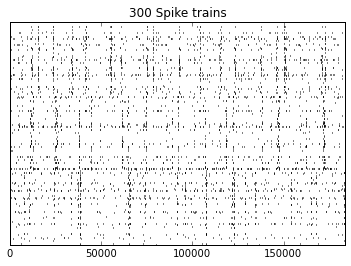

In [18]:
T, N = y.shape
figure()
xlim(0, T)
ylim(0, N)
for n in range(N):
    vlines(np.arange(T)[y[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks([])
gca().invert_yaxis()

In [19]:
T, N

(183383, 300)

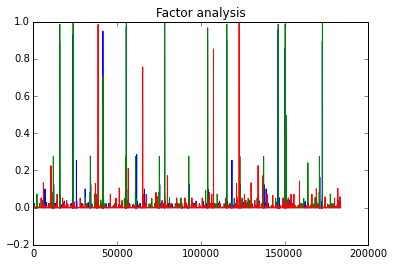

In [20]:
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    a0[l, :] *= np.linalg.norm(m0[:, l], ord=np.inf)
    m0[:, l] /= np.linalg.norm(m0[:, l], ord=np.inf)

figure()
plot(m0)
title('Factor analysis')

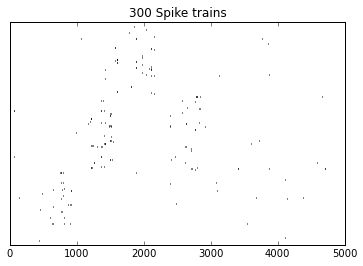

In [143]:
segment = np.arange(10000, 15000)
figure()
ylim(0, N)
for n in range(N):
    vlines(np.arange(T)[y[segment, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks([])
gca().invert_yaxis()

In [37]:
var = 5 * np.ones(L, dtype=float)
w = np.array([0.0001, 0.0001, 0.0001])
lbound, m1, a1, b1, new_var, new_scale, a0, b0, elapsed, converged = ichol_normalize_m.train(y, 0, var, w, b0=None, m0=m0, anorm=np.sqrt(N), hyper=False, kchol=800, niter=100, tol=1e-5, verbose=True)

/Users/yuan/variational/la.py:37: UserWarning: Not enough ranks
  warnings.warn('Not enough ranks')


KeyboardInterrupt: 

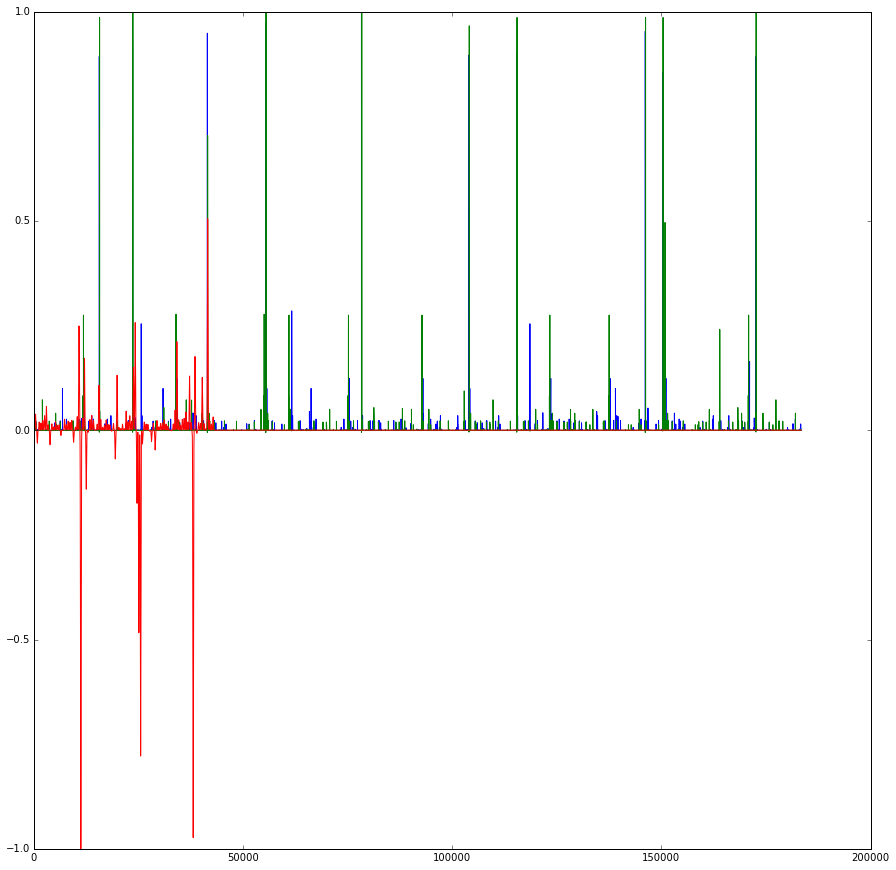

In [33]:
figure(figsize=(15, 15))
plot(m1)

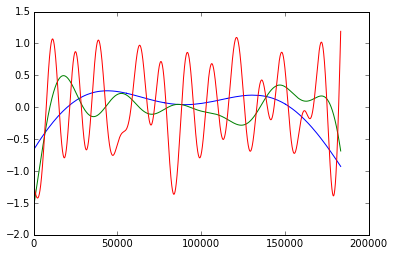

In [34]:
fig = figure()
plot(m1)
fig.savefig('Giancarlo.pdf')

In [36]:
savemat('Giancarlo.mat', {'mean': m1})

In [122]:
best_w

array([ 0.0001,  0.0001,  0.0001])

In [147]:
list(itertools.product((0.1, 0.2, 0.3), repeat=3))

[(0.1, 0.1, 0.1),
 (0.1, 0.1, 0.2),
 (0.1, 0.1, 0.3),
 (0.1, 0.2, 0.1),
 (0.1, 0.2, 0.2),
 (0.1, 0.2, 0.3),
 (0.1, 0.3, 0.1),
 (0.1, 0.3, 0.2),
 (0.1, 0.3, 0.3),
 (0.2, 0.1, 0.1),
 (0.2, 0.1, 0.2),
 (0.2, 0.1, 0.3),
 (0.2, 0.2, 0.1),
 (0.2, 0.2, 0.2),
 (0.2, 0.2, 0.3),
 (0.2, 0.3, 0.1),
 (0.2, 0.3, 0.2),
 (0.2, 0.3, 0.3),
 (0.3, 0.1, 0.1),
 (0.3, 0.1, 0.2),
 (0.3, 0.1, 0.3),
 (0.3, 0.2, 0.1),
 (0.3, 0.2, 0.2),
 (0.3, 0.2, 0.3),
 (0.3, 0.3, 0.1),
 (0.3, 0.3, 0.2),
 (0.3, 0.3, 0.3)]

In [195]:
L = 3
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y[segment, :])
a0 = fa.components_
for l in range(L):
    m0[:, l] -= np.mean(m0[:, l])
    m0[:, l] *= np.linalg.norm(a0[l, :]) / np.sqrt(N)
    a0[l, :] /= np.linalg.norm(a0[l, :]) / np.sqrt(N)
    
var = 5 * np.ones(L, dtype=float)

grid_w = np.array(list(itertools.product(np.logspace(-4, -2, 3), repeat=3)))

best_lb = np.NINF
best_m1 = None
lb = np.empty(grid_w.shape[0], dtype=float)
for i, row in enumerate(grid_w):
    lbound, m1, a1, b1, new_var, new_scale, a0, b0, elapsed, converged = model_chol.train(y[segment, :], 0, var, row, b0=None, m0=m0, anorm=np.sqrt(N), hyper=False, kchol=50, niter=100, tol=1e-5, verbose=False)
    lb[i] = lbound[-1]
    print(i, row, lbound[-1])
    if best_lb < lbound[-1]:
        best_lb = lbound[-1]
        best_w = row
        best_m1 = m1

0 [ 0.0001  0.0001  0.0001] -10162.5479394
1 [ 0.0001  0.0001  0.001 ] -10149.6788132
2 [ 0.0001  0.0001  0.01  ] -10046.0609774
3 [ 0.0001  0.001   0.0001] -10103.2030379
4 [ 0.0001  0.001   0.001 ] -10125.6119573
5 [ 0.0001  0.001   0.01  ] -10079.3488912
6 [ 0.0001  0.01    0.0001] -10125.1249619
7 [ 0.0001  0.01    0.001 ] -10078.1044151
8 [ 0.0001  0.01    0.01  ] -10079.1049051
9 [ 0.001   0.0001  0.0001] -10171.5744334
10 [ 0.001   0.0001  0.001 ] -10114.376599
11 [ 0.001   0.0001  0.01  ] -10140.7634004
12 [ 0.001   0.001   0.0001] -10108.7170654
13 [ 0.001  0.001  0.001] -10125.7165046
14 [ 0.001  0.001  0.01 ] -10145.4937188
15 [ 0.001   0.01    0.0001] -10093.5322951
16 [ 0.001  0.01   0.001] -10105.3104624
17 [ 0.001  0.01   0.01 ] -10137.7652838
18 [ 0.01    0.0001  0.0001] -10055.3750578
19 [ 0.01    0.0001  0.001 ] -10153.4419385
20 [ 0.01    0.0001  0.01  ] -10016.8093883
21 [ 0.01    0.001   0.0001] -10153.8481179
22 [ 0.01   0.001  0.001] -10110.7134039
23 [ 0.01   0.

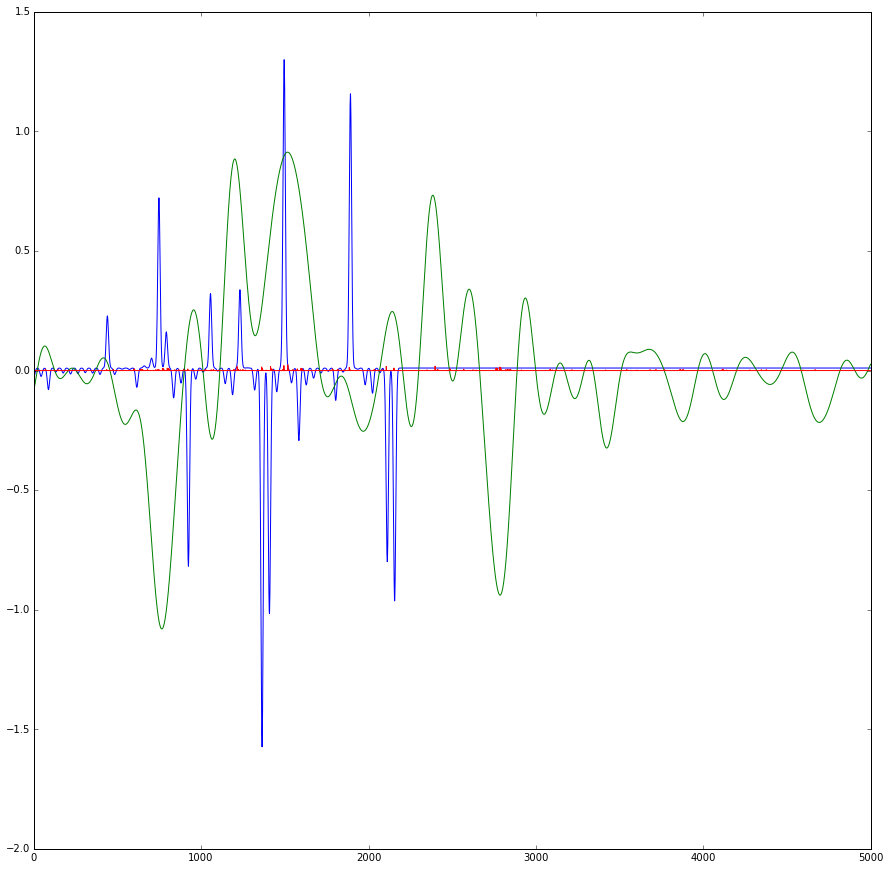

In [196]:
figure(figsize=(15, 15))
plot(best_m1)

In [197]:
best_w

array([ 0.01  ,  0.0001,  0.01  ])


Iteration[1]
lower bound = -26183.48063
increment = 1482243.2368596212
time = 1.46s
change in alpha = 1.5470921633
change in beta = 4.4721359510
change in posterior mean = 0.0913983210
change in prior variance = 0.0000000000
change in prior scale = 0.0000000000

Iteration[2]
lower bound = -25322.32185
increment = 861.1587841566
time = 1.70s
change in alpha = 0.0459599739
change in beta = 0.0534627707
change in posterior mean = 0.0570809571
change in prior variance = 0.0000000000
change in prior scale = 0.0000000000

Iteration[3]
lower bound = -24527.38019
increment = 794.9416627137
time = 1.46s
change in alpha = 0.0338939552
change in beta = 0.0520590006
change in posterior mean = 0.0231135996
change in prior variance = 0.0000000000
change in prior scale = 0.0000000000

Iteration[4]
lower bound = -23790.54918
increment = 736.8310087082
time = 1.40s
change in alpha = 0.0314025645
change in beta = 0.0507725241
change in posterior mean = 0.0144774162
change in prior variance = 0.00000000

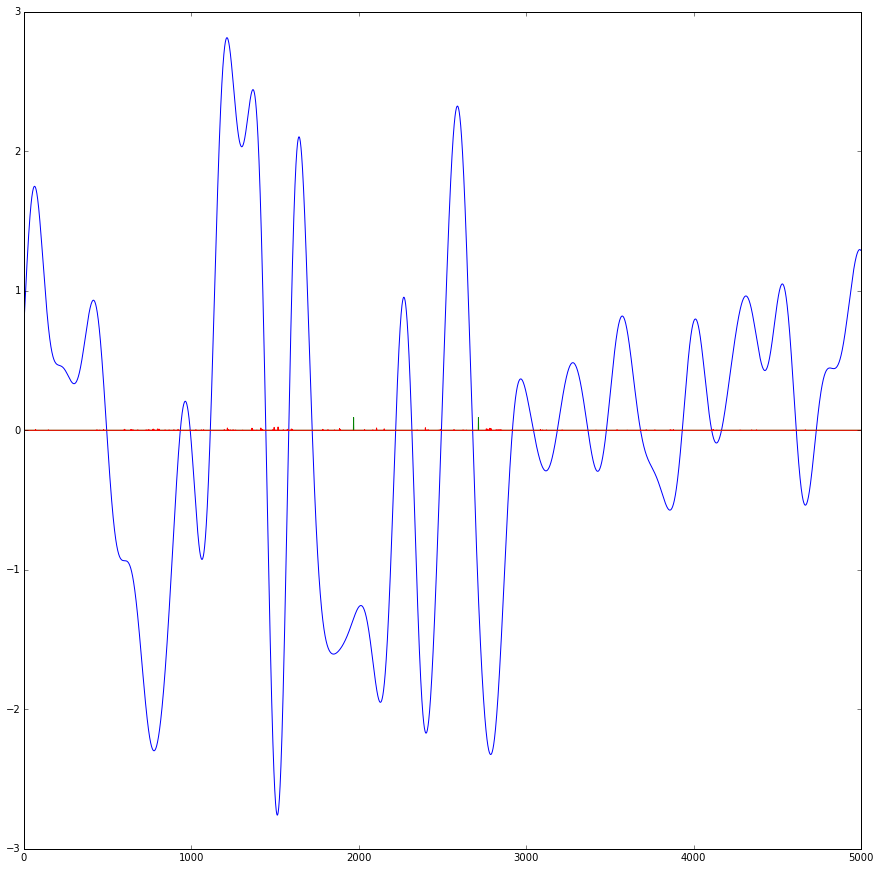

In [192]:
lbound, m1, a1, b1, new_var, new_scale, a0, b0, elapsed, converged = model_chol.train(y[segment, :], 0, var, best_w, b0=None, m0=m0, anorm=np.sqrt(N), hyper=False, kchol=50, niter=200, tol=1e-5, verbose=True)
figure(figsize=(15, 15))
plot(m1)

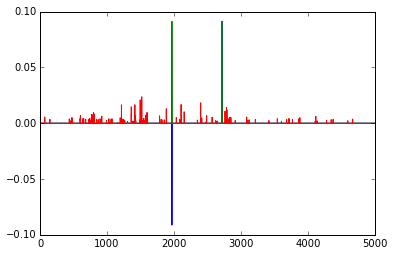

In [176]:
plot(m0)

In [1]:
%ls

Giancarlo.ipynb    ichol_V.py         main.py*           suppression.ipynb
__pycache__/       ichol_adadelta.py  model.py*          test/
data/              la.py              nohyper.py         util.py
ichol.py           latent_only.ipynb  simulation.py*
